In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
#pd.set_option('display.max_row', 10000)

In [2]:
train = pd.read_csv("train")
display(train.head())
test = pd.read_csv("test")
display(test.head())

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,timestamp,bidid,device_id,user_id,format,bidfloor,support_type,support_id,device_type,device_os,device_language,device_model,verticals_0,verticals_1,verticals_2,vertical_3,ad_id,bid_price,won_price,clicked
0,1430158023,VT56YgANZ5sK24hIAgB7+w==,a2304e2d-dd95-4431-a06e-9b976b83781f,CAESEJ5yQ9WDEoC_KMd3DzKeKl0,320x480,200000000,app,623367437,1,ios,fr_FR,iphone,1494,1462,105,937,544489,280000000,116000000,0
1,1430158024,VT56ZAAAeWMKNCwO6ABg+w==,fdef5b70-64c3-4afa-8e0e-8587bd4887e2,CAESEJ6WxEBHVaDXLlrXknLTCoA,320x480,1000000,app,353599677,1,ios,tr_TR,iphone,408,1462,1109,16,544489,280000000,195000000,0
2,1430158024,VT56ZAALt/oKG+GTGwB6sg==,db4cfc36-27f7-4e92-8201-d71d9b4d6cf7,CAESEPcNDSPNESnmoWp1Zck6j8A,320x480,199000000,app,911152486,1,ios,fr_FR,ipod,937,926,1462,1536,544489,280000000,241000000,0
3,1430158024,VT56ZAAMtH0KwmKp4AANng==,e113e09f-1899-4f97-94ac-00e243d8ef70,CAESELMvW0Vh_8Uwsio5w99n4qk,320x480,190000000,app,911793120,1,ios,fr_FR,iphone,937,1462,1536,1461,544489,280000000,137000000,0
4,1430158024,VT56ZAAOT5QKfN8IfAAieQ==,96653962-3033-476b-9dff-95d188f52d6d,CAESEKhcSWjJJHrkM-XAEDNaxgE,320x480,188000000,app,484115113,1,ios,fr_FR,iphone,61,13,299,0,544489,280000000,188000000,0


,timestamp,bidid,device_id,user_id,format,bidfloor,support_type,support_id,device_type,device_os,device_language,device_model,verticals_0,verticals_1,verticals_2,vertical_3,ad_id,bid_price,won_price
0,1430264861,VUAbtwAKfUwKG+JOugBfTw==,20189672-3ca0-48f8-957f-b2400005fea2,CAESEO1swnwzbyP_ulp5I6dwI9w,320x480,1000000,app,606697013,1,ios,en_EN,iphone,675,1462,0,0,544501,220000000,184000000
1,1430264862,VUAbuAANjzkKwo3v1AB++g==,8f46fac0-8893-4547-8ec7-028b4812057a,CAESEMgZsfgjSKT7GvZNAtFJaAs,320x480,1000000,app,905455244,1,ios,fr_FR,iphone,926,1462,1536,1071,544477,220000000,198000000
2,1430264862,VUAbuQAA39MKwuUk0wBMBQ==,692cb285-3ed0-4294-afda-fefb7a877238,CAESECYlSHMNcbKaLUtv2aXuBYw,320x480,197000000,app,623367437,1,ios,fr_FR,iphone,1494,1462,105,937,544501,220000000,197000000
3,1430264862,VUAbuQAB6HoKG+HGlQAW1w==,81f53cbd-0a22-4b94-87fb-8f3f4ef8148f,CAESEIM8HpwwPdYg_1FhZwa9sHo,320x480,198000000,app,911152486,1,ios,fr_FR,iphone,937,926,1462,1536,544501,220000000,208000000
4,1430264862,VUAbuQAJO6cKGxPLvQB1Sw==,cab4ae17-6b48-483e-ba68-ad49c8d944a0,CAESEK2HiR6F1ncLdKqp_F6vOF8,320x480,1000000,app,506916707,1,ios,en_EN,iphone,386,384,13,1379,544501,220000000,107000000


In [3]:
print(train.shape, test.shape)
print(train.nunique(), '\n', test.nunique())

(762239, 20) (508158, 19)
timestamp           91080
bidid              762239
device_id          317010
user_id            316552
format                  1
bidfloor               90
support_type            2
support_id           5084
device_type             1
device_os               1
device_language        52
device_model            2
verticals_0           333
verticals_1           283
verticals_2           248
vertical_3            183
ad_id                   3
bid_price               6
won_price             361
clicked                 2
dtype: int64 
 timestamp          109957
bidid              508158
device_id          215059
user_id            214824
format                  1
bidfloor               83
support_type            2
support_id           4055
device_type             1
device_os               1
device_language        53
device_model            2
verticals_0           294
verticals_1           255
verticals_2           212
vertical_3            154
ad_id                  

In [4]:
train_cat0 = train.loc[ train['clicked'] == 0 ]
train_cat1 = train.loc[ train['clicked'] == 1 ]
print(len(train_cat0))
print(len(train_cat1))
# the dataset is highly imbalanced

724386
37853


In [5]:
Event_Rate = train_cat1.shape[0]/train.shape[0]
while Event_Rate < 0.4:
    print(Event_Rate)
    train = train.append(train_cat1)
    train_cat1 = train.loc[ train['clicked'] == 1 ]
    Event_Rate = train_cat1.shape[0]/train.shape[0]
train_cat0 = train.loc[ train['clicked'] == 0 ]
train_cat1 = train.loc[ train['clicked'] == 1 ]
print(len(train_cat0))
print(len(train_cat1))
train = train.sample(frac=1).reset_index(drop=True)
print(train.shape)

0.04966027715716462
0.09462161851387091
0.17288461494545546
0.29480242598884354
724386
605648
(1330034, 20)


In [5]:
# choose under-sampling by removing 680000 random row from categorie 0
to_drop = np.random.choice(train_cat0.index, 680000, replace=False)
train_cat0 = train_cat0.drop(to_drop)
train_cat0.shape

(44386, 20)

In [6]:
train.nunique()

timestamp           91080
bidid              762239
device_id          317010
user_id            316552
format                  1
bidfloor               90
support_type            2
support_id           5084
device_type             1
device_os               1
device_language        52
device_model            2
verticals_0           333
verticals_1           283
verticals_2           248
vertical_3            183
ad_id                   3
bid_price               6
won_price             361
clicked                 2
dtype: int64

In [7]:
def convert_type(df, feature, new_type):
    df[[feature]] = df[[feature]].astype(new_type)
    return df

In [8]:
train['support_id'] = train['support_id'].replace({"None": 0})
test['support_id'] = test['support_id'].replace({"None": 0})
train = convert_type(train, 'support_id', int)
test = convert_type(test, 'support_id', int)
print(train.dtypes, '\n', test.dtypes)
#train.groupby('support_id').count()
#train.support_id.unique()

timestamp           int64
bidid              object
device_id          object
user_id            object
format             object
bidfloor            int64
support_type       object
support_id          int64
device_type         int64
device_os          object
device_language    object
device_model       object
verticals_0         int64
verticals_1         int64
verticals_2         int64
vertical_3          int64
ad_id               int64
bid_price           int64
won_price           int64
clicked             int64
dtype: object 
 timestamp           int64
bidid              object
device_id          object
user_id            object
format             object
bidfloor            int64
support_type       object
support_id          int64
device_type         int64
device_os          object
device_language    object
device_model       object
verticals_0         int64
verticals_1         int64
verticals_2         int64
vertical_3          int64
ad_id               int64
bid_price           in

In [9]:
train[(train['user_id'] == '') & (train['clicked'] == 0)].shape

(0, 20)

In [ ]:
t = (train['clicked'] == 0)
t.value_counts()

In [9]:
def remove_constant_feat(df): #method to remove constant feature
    counter = df.nunique()
    for i in counter.index:
        if counter[i] == 1:
            df = df.drop(i, axis=1)
    return df

In [10]:
train = train.drop('bidid', axis=1) #remove bidid column
test = test.drop('bidid', axis=1) #remove bidid column
train = remove_constant_feat(train)
test = remove_constant_feat(test)
print(train.shape, test.shape)
#train.head()

(1330034, 16) (508158, 15)


In [11]:
display(train.describe())
display(test.describe())

,timestamp,bidfloor,support_id,verticals_0,verticals_1,verticals_2,vertical_3,ad_id,bid_price,won_price,clicked
count,1.330034e+06,1.330034e+06,1.330034e+06,1.330034e+06,1.330034e+06,1.330034e+06,1.330034e+06,1.330034e+06,1.330034e+06,1.330034e+06,1.330034e+06
mean,1.430229e+09,1.100546e+08,7.088067e+08,7.518370e+02,1.068414e+03,7.425406e+02,7.033390e+02,5.444889e+05,2.490405e+08,1.465724e+08,4.553628e-01
std,2.516853e+04,8.510241e+07,2.047072e+08,5.646216e+02,5.716447e+02,6.485766e+02,6.479922e+02,9.664388e+00,4.151320e+07,6.216256e+07,4.980037e-01
min,1.430158e+09,1.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.444770e+05,2.000000e+08,-1.000000e+05,0.000000e+00
25%,1.430219e+09,1.000000e+06,5.255068e+08,2.200000e+02,9.260000e+02,1.050000e+02,0.000000e+00,5.444770e+05,2.200000e+08,1.030000e+08,0.000000e+00
50%,1.430234e+09,1.310000e+08,6.521481e+08,9.260000e+02,1.462000e+03,4.390000e+02,9.370000e+02,5.444890e+05,2.200000e+08,1.450000e+08,0.000000e+00
75%,1.430248e+09,1.880000e+08,9.117931e+08,9.370000e+02,1.462000e+03,1.462000e+03,1.461000e+03,5.445010e+05,2.800000e+08,1.880000e+08,1.000000e+00
max,1.430265e+09,3.440000e+08,9.869362e+08,5.693000e+03,5.711000e+03,5.527000e+03,5.182000e+03,5.445010e+05,3.600000e+08,3.600000e+08,1.000000e+00


,timestamp,bidfloor,support_id,verticals_0,verticals_1,verticals_2,vertical_3,ad_id,bid_price,won_price
count,5.081580e+05,5.081580e+05,5.081580e+05,508158.000000,508158.000000,508158.000000,508158.000000,508158.000000,5.081580e+05,5.081580e+05
mean,1.430358e+09,9.823643e+07,7.301053e+08,744.735169,1060.074205,814.250910,702.113612,544493.477052,2.410010e+08,1.783978e+08
std,4.597176e+04,8.478177e+07,2.042088e+08,643.726555,575.610727,649.215254,643.740032,8.400720,6.563184e+07,5.201003e+07
min,1.430265e+09,1.000000e+06,0.000000e+00,0.000000,0.000000,0.000000,0.000000,544474.000000,1.000000e+08,-1.000000e+05
25%,1.430314e+09,1.000000e+06,5.627046e+08,220.000000,901.000000,105.000000,0.000000,544489.000000,2.000000e+08,1.720000e+08
50%,1.430384e+09,1.280000e+08,7.848651e+08,926.000000,1462.000000,1071.000000,937.000000,544501.000000,2.200000e+08,1.850000e+08
75%,1.430395e+09,1.880000e+08,9.117931e+08,937.000000,1462.000000,1462.000000,1461.000000,544501.000000,2.200000e+08,1.970000e+08
max,1.430413e+09,2.760000e+08,9.869362e+08,5693.000000,5200.000000,5527.000000,1611.000000,544501.000000,3.800000e+08,3.800000e+08


In [12]:
train_x = train.iloc[:,0:15] #independant variable
train_y = train.iloc[:,15] #lebels
train_x.head()

,timestamp,device_id,user_id,bidfloor,support_type,support_id,device_language,device_model,verticals_0,verticals_1,verticals_2,vertical_3,ad_id,bid_price,won_price
0,1430252301,fdb0a28b-f9ab-4624-be6f-b900f22ac3ac,CAESEL7WqGdADkv6H_VnCTpS1qk,126000000,app,370406465,fr_FR,iphone,294,1077,20,1599,544477,220000000,89000000
1,1430174639,34e4ce45-f53b-407c-b198-c8cb0be4ea05,CAESEAdQfkbU2iK7FHRr1k77czA,1000000,app,982980691,fr_FR,ipod,1536,1461,1071,1109,544477,210000000,173000000
2,1430253256,834d758d-614a-4b41-a2b7-ef97fe57156b,CAESEFt2v1-OblHHx3iJNY1kI2o,195000000,app,596006531,fr_FR,iphone,937,1462,105,8,544501,220000000,91000000
3,1430196621,86b8a9c4-7d35-47b6-9d22-a1d6cca0476c,CAESEIBh26CgRmR4EDzI97WntWc,1000000,app,978260273,fr_FR,iphone,1536,1461,1071,1109,544477,210000000,128000000
4,1430214959,22c91bab-8590-4470-b6ea-61617652a048,CAESEDhfmBGyg165p47A_cqA9bY,1000000,app,979578134,fr_FR,iphone,227,1462,1536,1461,544477,280000000,154000000


In [13]:
def get_categorical_data(df):
    cols = df.columns
    num_cols = df._get_numeric_data().columns #get numerical columns
    cat_cols = list(set(cols) - set(num_cols)) #get categorical columns
    return cat_cols    

In [14]:
train_cat_cols = get_categorical_data(train_x)
test_cat_cols = get_categorical_data(test)
if train_cat_cols == test_cat_cols:
    print(True)

True


In [15]:
def cat_to_num_cols(df, categorical_cols):
    le = preprocessing.LabelEncoder()
    for i in categorical_cols:
        print(i)
        le.fit(df[i])
        df[i] = le.transform(df[i]) 
    return df

In [16]:
frames = [train_x, test]
dataset = pd.concat(frames)
print(dataset.shape)
dataset = cat_to_num_cols(dataset, train_cat_cols)
dataset.iloc[0:15, :]

(1838192, 15)
device_language
support_type
user_id
device_model
device_id


,timestamp,device_id,user_id,bidfloor,support_type,support_id,device_language,device_model,verticals_0,verticals_1,verticals_2,vertical_3,ad_id,bid_price,won_price
0,1430252301,452439,316644,126000000,0,370406465,16,0,294,1077,20,1599,544477,220000000,89000000
1,1430174639,94548,18299,1000000,0,982980691,16,1,1536,1461,1071,1109,544477,210000000,173000000
2,1430253256,234183,167948,195000000,0,596006531,16,0,937,1462,105,8,544501,220000000,91000000
3,1430196621,240271,233483,1000000,0,978260273,16,0,1536,1461,1071,1109,544477,210000000,128000000
4,1430214959,62190,105502,1000000,0,979578134,16,0,227,1462,1536,1461,544477,280000000,154000000
5,1430251111,255660,255364,126000000,0,370406465,16,0,294,1077,20,1599,544501,220000000,28000000
6,1430208827,411813,281945,1000000,0,329504506,16,0,448,1109,449,0,544501,280000000,240000000
7,1430169254,255493,448034,188000000,0,484115113,16,0,61,13,299,0,544477,210000000,188000000
8,1430223121,359788,17832,131000000,0,956432528,16,0,220,0,0,0,544477,280000000,260000000
9,1430223138,251517,118937,189000000,0,911793120,16,0,937,1462,1536,1461,544489,280000000,116000000


In [17]:
train_x, test_x = dataset.iloc[:train.shape[0], :], dataset.iloc[train.shape[0]:, :]
print(train_x.shape, test_x.shape)
display(train_x.head())
display(test_x.head())

(1330034, 15) (508158, 15)


,timestamp,device_id,user_id,bidfloor,support_type,support_id,device_language,device_model,verticals_0,verticals_1,verticals_2,vertical_3,ad_id,bid_price,won_price
0,1430252301,452439,316644,126000000,0,370406465,16,0,294,1077,20,1599,544477,220000000,89000000
1,1430174639,94548,18299,1000000,0,982980691,16,1,1536,1461,1071,1109,544477,210000000,173000000
2,1430253256,234183,167948,195000000,0,596006531,16,0,937,1462,105,8,544501,220000000,91000000
3,1430196621,240271,233483,1000000,0,978260273,16,0,1536,1461,1071,1109,544477,210000000,128000000
4,1430214959,62190,105502,1000000,0,979578134,16,0,227,1462,1536,1461,544477,280000000,154000000


,timestamp,device_id,user_id,bidfloor,support_type,support_id,device_language,device_model,verticals_0,verticals_1,verticals_2,vertical_3,ad_id,bid_price,won_price
0,1430264861,57357,399743,1000000,0,606697013,11,0,675,1462,0,0,544501,220000000,184000000
1,1430264862,255449,361123,1000000,0,905455244,16,0,926,1462,1536,1071,544477,220000000,198000000
2,1430264862,187710,72636,197000000,0,623367437,16,0,1494,1462,105,937,544501,220000000,197000000
3,1430264862,231712,238101,198000000,0,911152486,16,0,937,926,1462,1536,544501,220000000,208000000
4,1430264862,361026,285994,1000000,0,506916707,11,0,386,384,13,1379,544501,220000000,107000000


In [18]:
clf = RandomForestClassifier(n_estimators=11, n_jobs=-1)
model = clf.fit(train_x, train_y)

In [19]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = train_x.columns,columns=['importance']).sort_values('importance', ascending=False)
feature_importances.to_pickle('feature_importances.pkl')
feature_importances.iloc[:,:]

,importance
user_id,0.207272
device_id,0.207141
timestamp,0.204279
won_price,0.168608
support_id,0.039494
ad_id,0.032425
bidfloor,0.025763
verticals_0,0.024341
bid_price,0.022399
verticals_2,0.021061


In [20]:
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(train_x.shape[1])
    plt.figure(figsize=(40,10))
    plt.bar(index, model.feature_importances_)
    plt.xlabel('feature', fontsize=20)
    plt.ylabel('importance', fontsize=20)
    plt.xticks(index, train_x.columns, fontsize=20, rotation=30)
    plt.title('feature importances')
    plt.show()

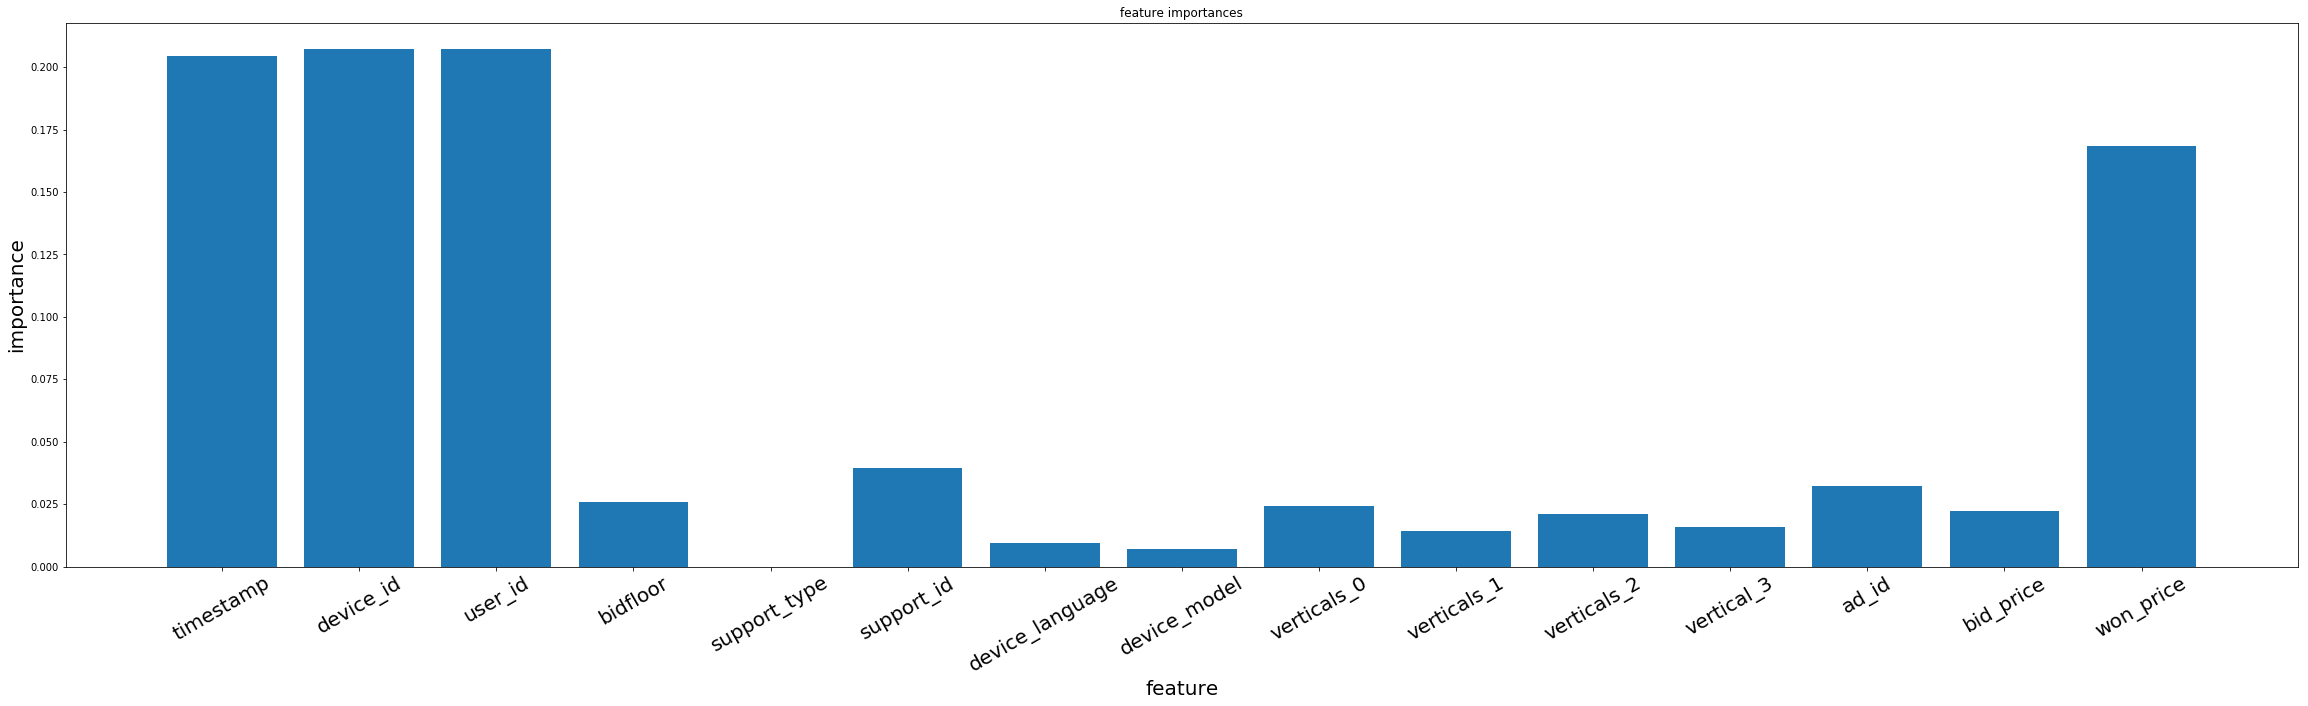

In [21]:
plot_bar_x()

In [22]:
print(clf.score(train_x, train_y))
#print(clf.n_features_)
#print(clf.predict_proba(train_x)[0:100])

0.999285732545183


In [23]:
def remove_useless_features(df_list, feature_importances, threshold): #remove useless features
    for i in feature_importances.index:
        if feature_importances.loc[i][0] < threshold:
            df_list = [df.drop(i, axis=1) for df in df_list]
    return df_list
train_x, test_x = remove_useless_features([train_x, test_x], feature_importances, 0.16)
display(train_x.head())
display(test_x.head())

,timestamp,device_id,user_id,won_price
0,1430252301,452439,316644,89000000
1,1430174639,94548,18299,173000000
2,1430253256,234183,167948,91000000
3,1430196621,240271,233483,128000000
4,1430214959,62190,105502,154000000


,timestamp,device_id,user_id,won_price
0,1430264861,57357,399743,184000000
1,1430264862,255449,361123,198000000
2,1430264862,187710,72636,197000000
3,1430264862,231712,238101,208000000
4,1430264862,361026,285994,107000000


In [24]:
train = train_x.join(train_y) #join the data with labels
train.to_pickle('new_train.pkl') # save the new dataframe
test_x.to_pickle('new_test.pkl') # save the new dataframe
train.iloc[0:15, :]

,timestamp,device_id,user_id,won_price,clicked
0,1430252301,452439,316644,89000000,0
1,1430174639,94548,18299,173000000,0
2,1430253256,234183,167948,91000000,0
3,1430196621,240271,233483,128000000,0
4,1430214959,62190,105502,154000000,0
5,1430251111,255660,255364,28000000,1
6,1430208827,411813,281945,240000000,1
7,1430169254,255493,448034,188000000,0
8,1430223121,359788,17832,260000000,1
9,1430223138,251517,118937,116000000,0
